In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_html('https://fbref.com/en/players/49296448/Joshua-Kimmich')[0]
df

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.19,91.0
1,npxG,0.13,89.0
2,Shots Total,1.47,83.0
3,Assists,0.40,99.0
4,xA,0.26,98.0
5,npxG+xA,0.39,97.0
6,Shot-Creating Actions,4.64,98.0
7,NaN,NaN,NaN
8,Passes Attempted,84.80,97.0
9,Pass Completion %,83.4%,45.0


In [3]:
new_df=df.dropna() 
# reset index
new_df.reset_index(drop=True,inplace=True)
# delete % character on pass completion row (83.4% -> 83.4)
new_df.at[8,'Per 90'] = new_df.at[8,'Per 90'][:-1]
new_df

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.19,91.0
1,npxG,0.13,89.0
2,Shots Total,1.47,83.0
3,Assists,0.40,99.0
4,xA,0.26,98.0
5,npxG+xA,0.39,97.0
6,Shot-Creating Actions,4.64,98.0
7,Passes Attempted,84.80,97.0
8,Pass Completion %,83.4,45.0
9,Progressive Passes,9.17,99.0


In [4]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager, add_image

# parameter list
params = [
    "Non-Penalty Goals", "npxG", "Assists","xA","Shots Total","Shot-Creating Actions",
    "Interceptions","Clearances","Aerials won",
    "Passes Attempted","Pass Completion %","Progressive Passes","Progressive Carries","Dribbles Completed","Touches (Att Pen)"
]


In [5]:
values_p90=[]
max_values=[]
min_values=[0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i in range(15):
    for j in range(20):
      if(params[i]==new_df['Statistic'][j]):
        values_p90.append(new_df['Per 90'][j])
        max_values.append(np.float32((np.float32(new_df['Per 90'][j])/np.float32(new_df['Percentile'][j]))*100))
print(max_values)
print(values_p90)

[0.20879121, 0.14606741, 0.40404043, 0.26530612, 1.7710844, 4.734694, 2.35, 3.4848485, 2.5714288, 87.42268, 185.33333, 9.262627, 7.870968, 1.5957447, 2.1384616]
['0.19', '0.13', '0.40', '0.26', '1.47', '4.64', '1.88', '1.15', '0.72', '84.80', '83.4', '9.17', '7.32', '0.75', '1.39']


In [6]:
# str to float
new_values_p90 = []
for item in values_p90:
    new_values_p90.append(float(item))
print(new_values_p90)

[0.19, 0.13, 0.4, 0.26, 1.47, 4.64, 1.88, 1.15, 0.72, 84.8, 83.4, 9.17, 7.32, 0.75, 1.39]


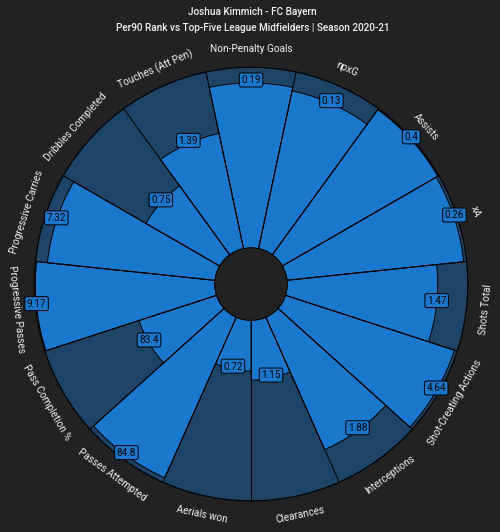

In [8]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_values,        # min range values
    max_range=max_values,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=20,
)

# plot pizza
fig, ax = baker.make_pizza(
    new_values_p90,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Joshua Kimmich - FC Bayern", size=18,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per90 Rank vs Top-Five League Midfielders | Season 2020-21",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


plt.show()
fig.savefig('outputs/Kimmich-per90PizzaChart.png', dpi=200, facecolor=fig.get_facecolor(), edgecolor='None', transparent=True)

